In [1]:
1+1

2

In [21]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Read Data
data=pd.read_csv("data.csv")
data

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [72]:
data.isna().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [75]:
data.duplicated().sum()

4014

In [76]:
data.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [78]:
data.describe(include='O')

,job_title,job_category,salary_currency,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
count,9355,9355,9355,9355,9355,9355,9355,9355,9355
unique,125,10,11,83,4,4,3,70,3
top,Data Engineer,Data Science and Research,USD,United States,Senior,Full-time,In-person,United States,M
freq,2195,3014,8591,8086,6709,9310,5730,8132,8448


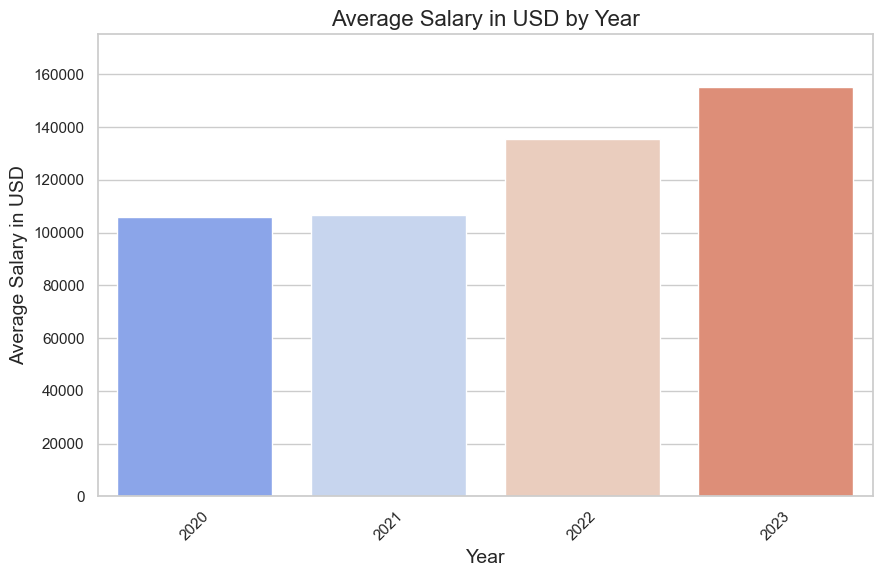

In [28]:
#Get Average Salaries for each year
average_salaries_per_year = data.groupby('work_year')['salary_in_usd'].mean().reset_index()
average_salaries_per_year.rename(columns={'salary_in_usd': 'average_salary_in_usd'}, inplace=True)
average_salaries_per_year

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot for average salaries per year
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='work_year', y='average_salary_in_usd', data=average_salaries_per_year, palette='coolwarm')

# Add labels and title
plt.title('Average Salary in USD by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Salary in USD', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, max(average_salaries_per_year['average_salary_in_usd']) + 20000)  # Adjusting y-axis limits for better visualization

# Display the plot
plt.show()

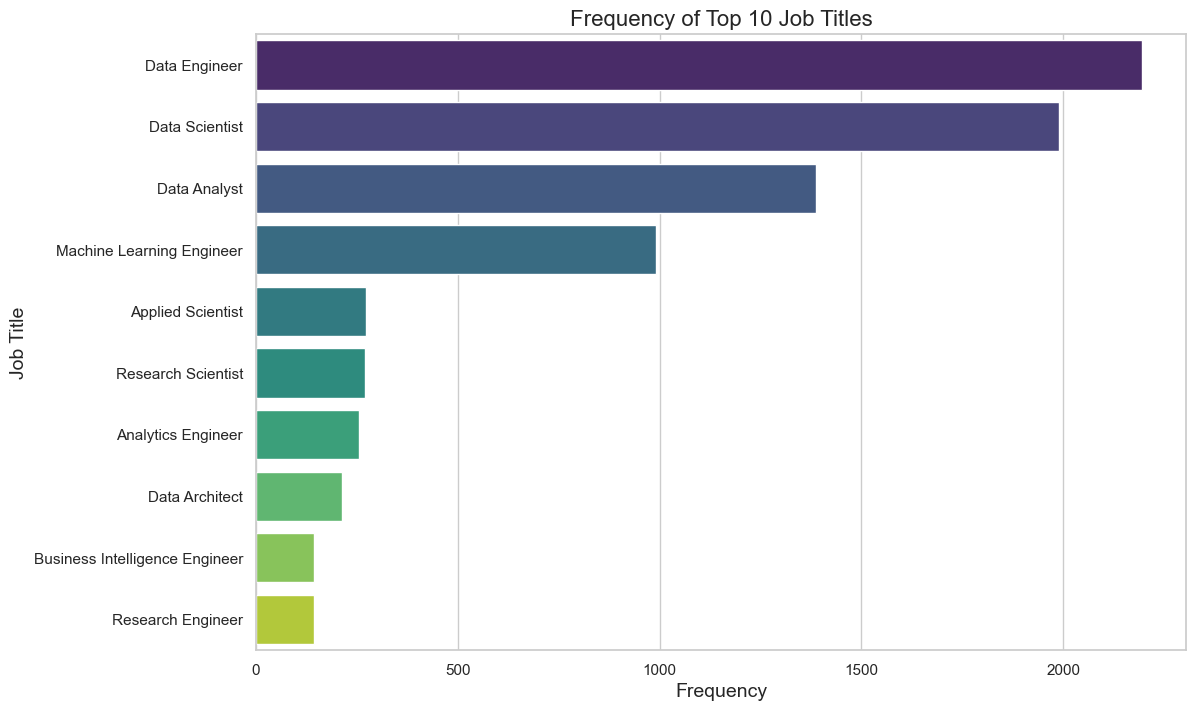

In [43]:
# Calculate the frequency of each job title
job_title_frequency = data['job_title'].value_counts().reset_index()
job_title_frequency.rename(columns={'index': 'job_title', 'job_title': 'frequency'}, inplace=True)
job_title_frequency

# Filtering to show top 10 job titles for better visualization clarity
top_job_titles = job_title_frequency.head(10)

# Create a bar plot for the frequency of job titles
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='count', y='frequency', data=top_job_titles, palette='viridis')

# Add labels and title
plt.title('Frequency of Top 10 Job Titles', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Job Title', fontsize=14)

# Display the plot
plt.show()



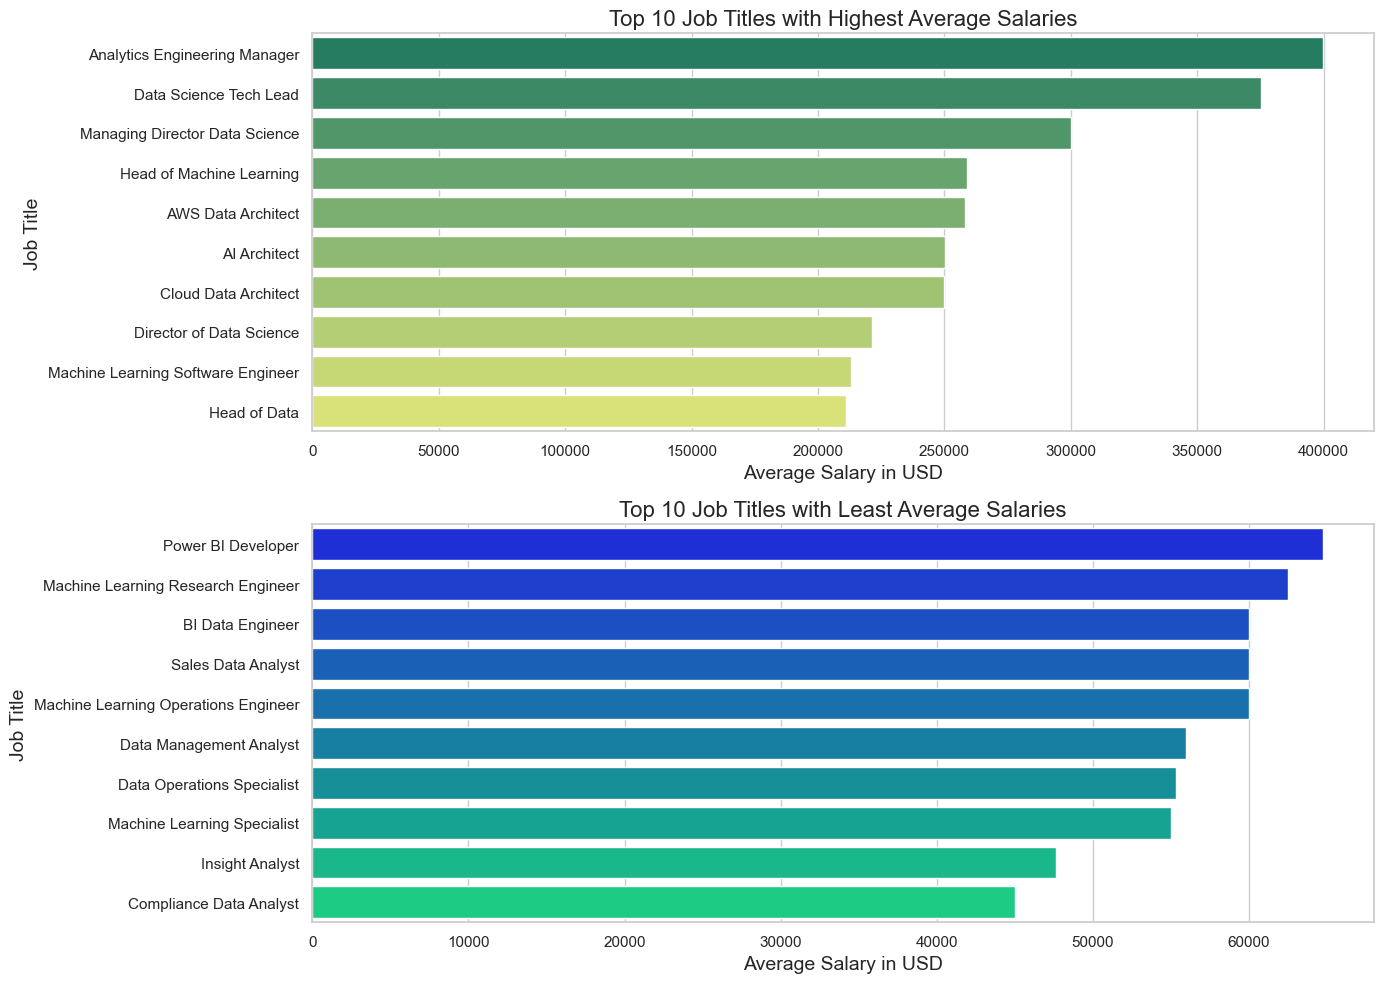

In [44]:
# Calculate average salary for each job title
average_salary_by_job_title = data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()
average_salary_by_job_title.rename(columns={'salary_in_usd': 'average_salary_in_usd'}, inplace=True)

# Display top and least average salaries by job title
top_average_salaries = average_salary_by_job_title.head(10)
least_average_salaries = average_salary_by_job_title.tail(10)

# Visualization of average salaries by job titles
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
sns.barplot(x='average_salary_in_usd', y='job_title', data=top_average_salaries, palette='summer')
plt.title('Top 10 Job Titles with Highest Average Salaries', fontsize=16)
plt.xlabel('Average Salary in USD', fontsize=14)
plt.ylabel('Job Title', fontsize=14)

plt.subplot(2, 1, 2)
sns.barplot(x='average_salary_in_usd', y='job_title', data=least_average_salaries, palette='winter')
plt.title('Top 10 Job Titles with Least Average Salaries', fontsize=16)
plt.xlabel('Average Salary in USD', fontsize=14)
plt.ylabel('Job Title', fontsize=14)

plt.tight_layout()
plt.show()


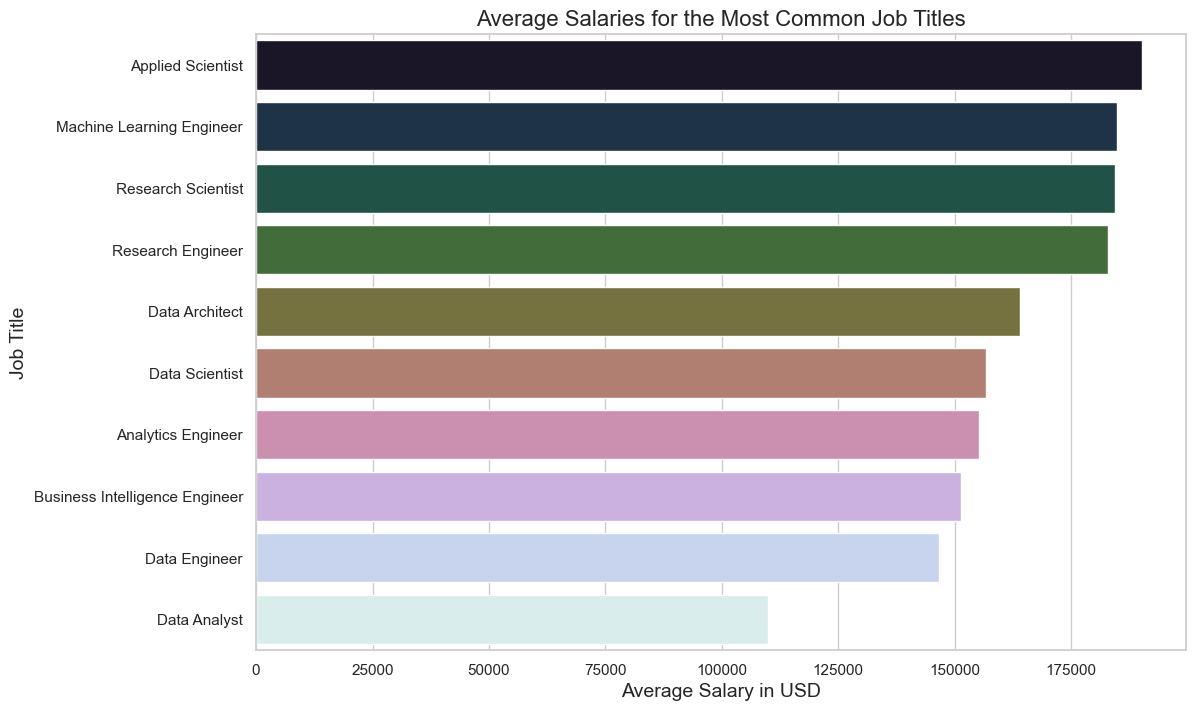

In [64]:
# Calculate the frequency of each job title
job_titles = data['job_title'].value_counts().reset_index()
job_titles.rename(columns={'index': 'job_title'}, inplace=True)
top_job_titles = job_titles.head(10)  # Assuming you want to focus on the top 10 for averaging

# Make sure to use 'job_title' column from top_job_titles for filtering
average_salaries_common_jobs_corrected = data[data['job_title'].isin(top_job_titles['job_title'])] \
    .groupby('job_title')['salary_in_usd'] \
    .mean().sort_values(ascending=False) \
    .reset_index()
average_salaries_common_jobs_corrected.rename(columns={'salary_in_usd': 'average_salary_in_usd'}, inplace=True)


plt.figure(figsize=(12, 8))
sns.barplot(x='average_salary_in_usd', y='job_title', data=average_salaries_common_jobs_corrected, palette='cubehelix')
plt.title('Average Salaries for the Most Common Job Titles', fontsize=16)
plt.xlabel('Average Salary in USD', fontsize=14)
plt.ylabel('Job Title', fontsize=14)
plt.show()


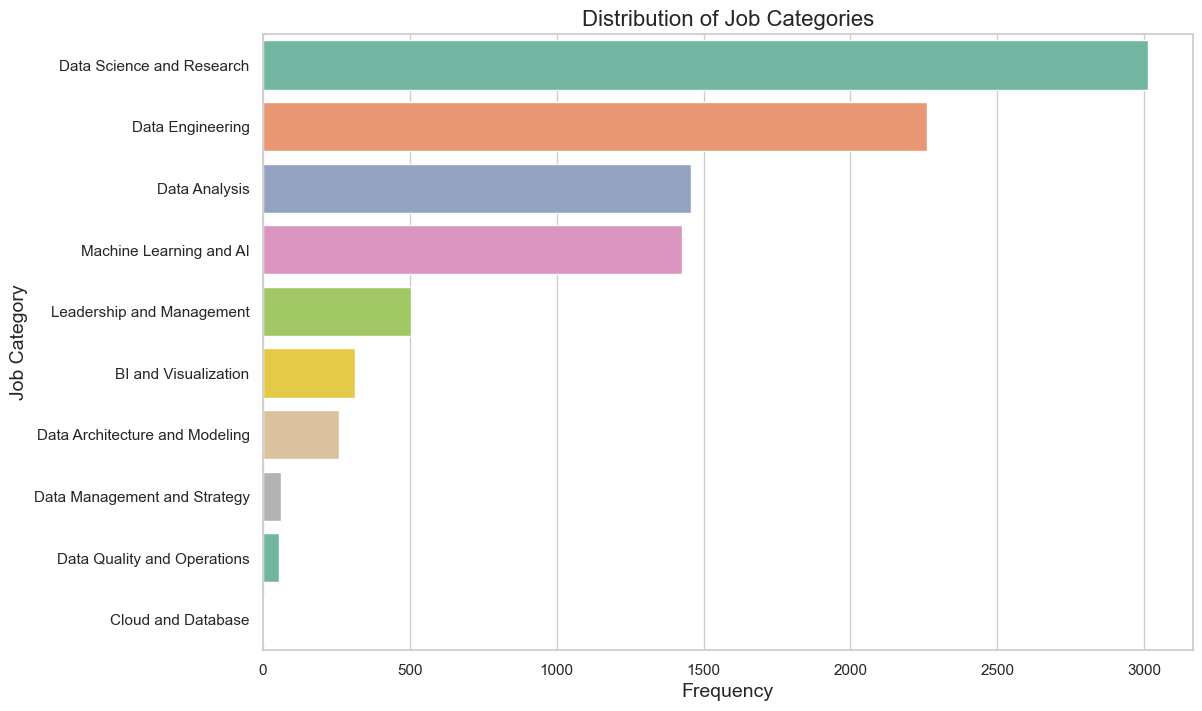

In [69]:
# Calculate the frequency of each job category
job_category_frequency = data['job_category'].value_counts().reset_index()
job_category_frequency.rename(columns={'index': 'job_category'}, inplace=True)

# Visualization of the distribution of job categories
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='job_category', data=job_category_frequency, palette='Set2')
plt.title('Distribution of Job Categories', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Job Category', fontsize=14)

plt.show()

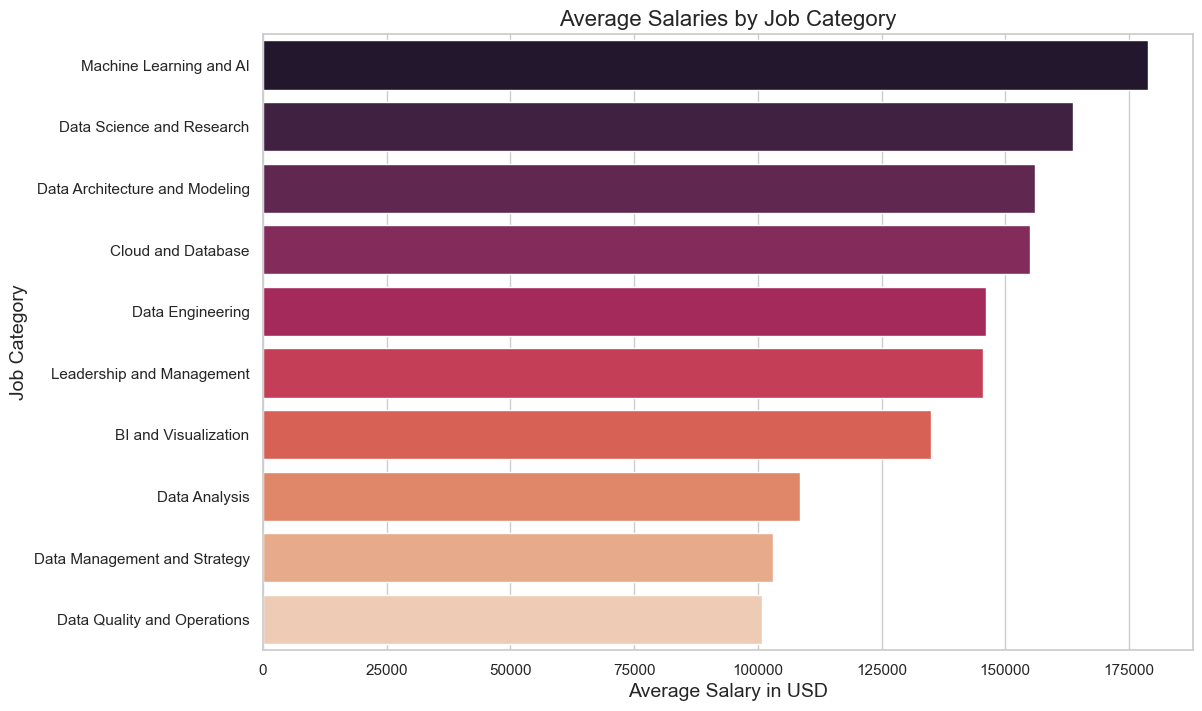

In [70]:
# Calculate average salary for each job category
average_salary_by_category = data.groupby('job_category')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()
average_salary_by_category.rename(columns={'salary_in_usd': 'average_salary_in_usd'}, inplace=True)

# Visualization of average salaries by job categories
plt.figure(figsize=(12, 8))
sns.barplot(x='average_salary_in_usd', y='job_category', data=average_salary_by_category, palette='rocket')
plt.title('Average Salaries by Job Category', fontsize=16)
plt.xlabel('Average Salary in USD', fontsize=14)
plt.ylabel('Job Category', fontsize=14)

plt.show()


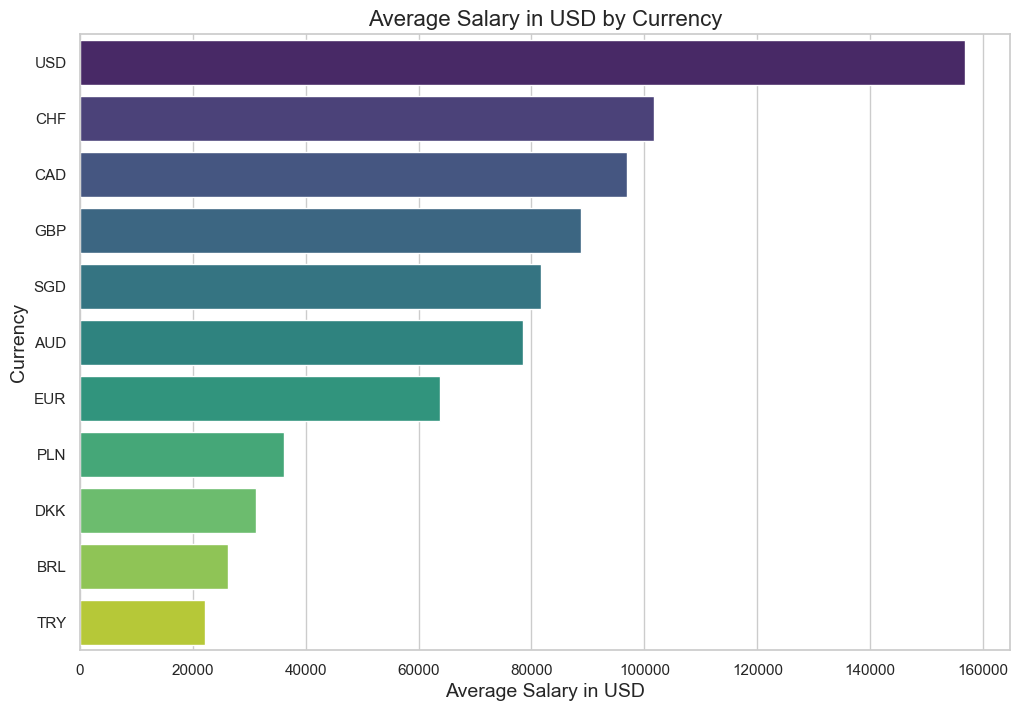

In [80]:
# Calculate average salary in USD for each currency type
average_salary_currency = data.groupby('salary_currency')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()
average_salary_currency.rename(columns={'salary_in_usd': 'average_salary_in_usd'}, inplace=True)

# Visualization of average salary in USD based on currency
plt.figure(figsize=(12, 8))
sns.barplot(x='average_salary_in_usd', y='salary_currency', data=average_salary_currency, palette='viridis')
plt.title('Average Salary in USD by Currency', fontsize=16)
plt.xlabel('Average Salary in USD', fontsize=14)
plt.ylabel('Currency', fontsize=14)

plt.show()


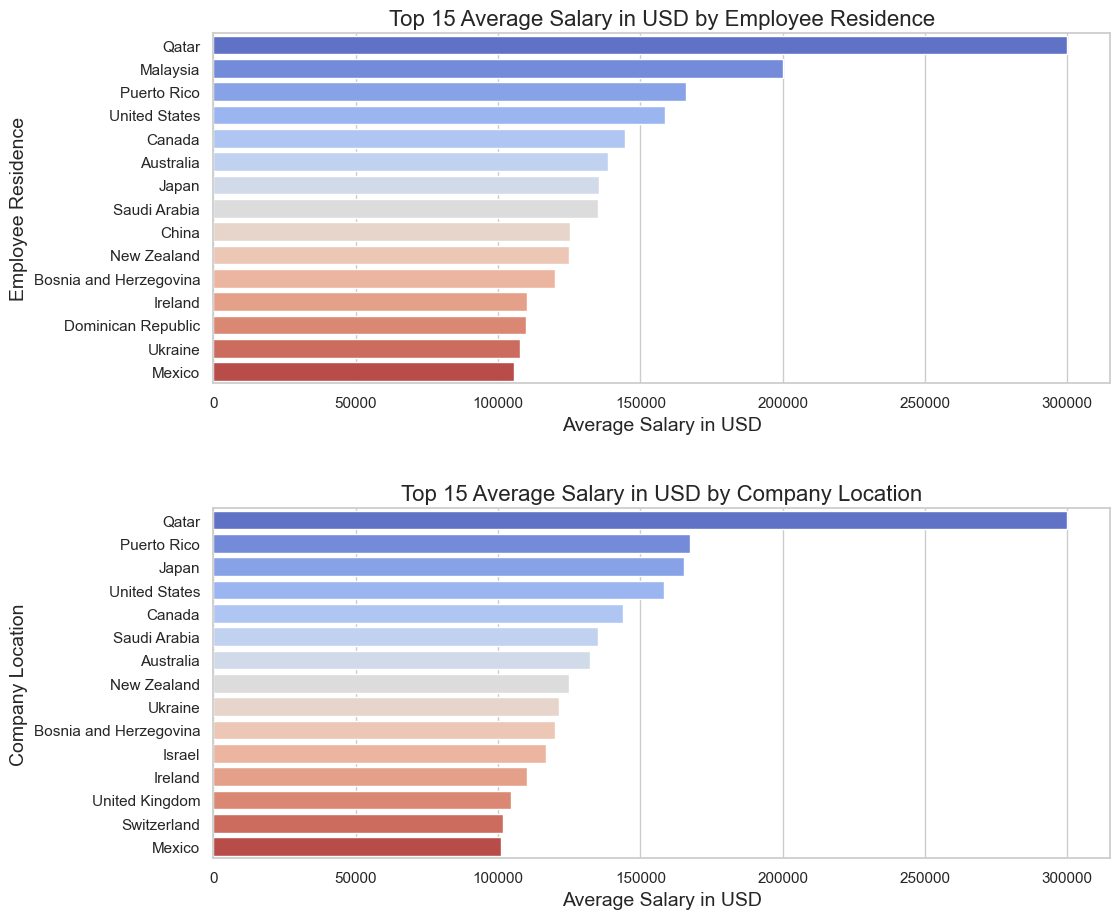

In [83]:
# Calculate average salary based on employee residence
average_salary_by_residence = data.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()
average_salary_by_residence.rename(columns={'salary_in_usd': 'average_salary_in_usd'}, inplace=True)

# Calculate average salary based on company location
average_salary_by_company_location = data.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()
average_salary_by_company_location.rename(columns={'salary_in_usd': 'average_salary_in_usd'}, inplace=True)

# Filter the top 15 for each to avoid clutter
top_residence = average_salary_by_residence.head(15)
top_company_location = average_salary_by_company_location.head(15)

# Increase plot size and separate plots for clarity
plt.figure(figsize=(12, 10))

# Plot for average salary by employee residence
plt.subplot(2, 1, 1)
sns.barplot(x='average_salary_in_usd', y='employee_residence', data=top_residence, palette='coolwarm')
plt.title('Top 15 Average Salary in USD by Employee Residence', fontsize=16)
plt.xlabel('Average Salary in USD', fontsize=14)
plt.ylabel('Employee Residence', fontsize=14)

# Plot for average salary by company location
plt.subplot(2, 1, 2)
sns.barplot(x='average_salary_in_usd', y='company_location', data=top_company_location, palette='coolwarm')
plt.title('Top 15 Average Salary in USD by Company Location', fontsize=16)
plt.xlabel('Average Salary in USD', fontsize=14)
plt.ylabel('Company Location', fontsize=14)

plt.tight_layout(pad=3.0)
plt.show()


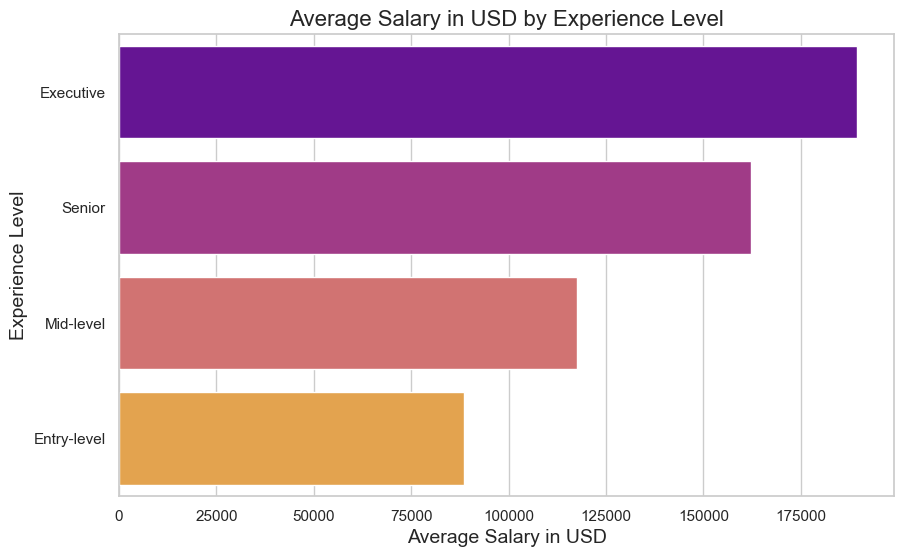

In [85]:
# Calculate average salary by experience level
average_salary_by_experience = data.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()
average_salary_by_experience.rename(columns={'salary_in_usd': 'average_salary_in_usd'}, inplace=True)

# Visualization of average salary by experience level
plt.figure(figsize=(10, 6))
sns.barplot(x='average_salary_in_usd', y='experience_level', data=average_salary_by_experience, palette='plasma')
plt.title('Average Salary in USD by Experience Level', fontsize=16)
plt.xlabel('Average Salary in USD', fontsize=14)
plt.ylabel('Experience Level', fontsize=14)

plt.show()


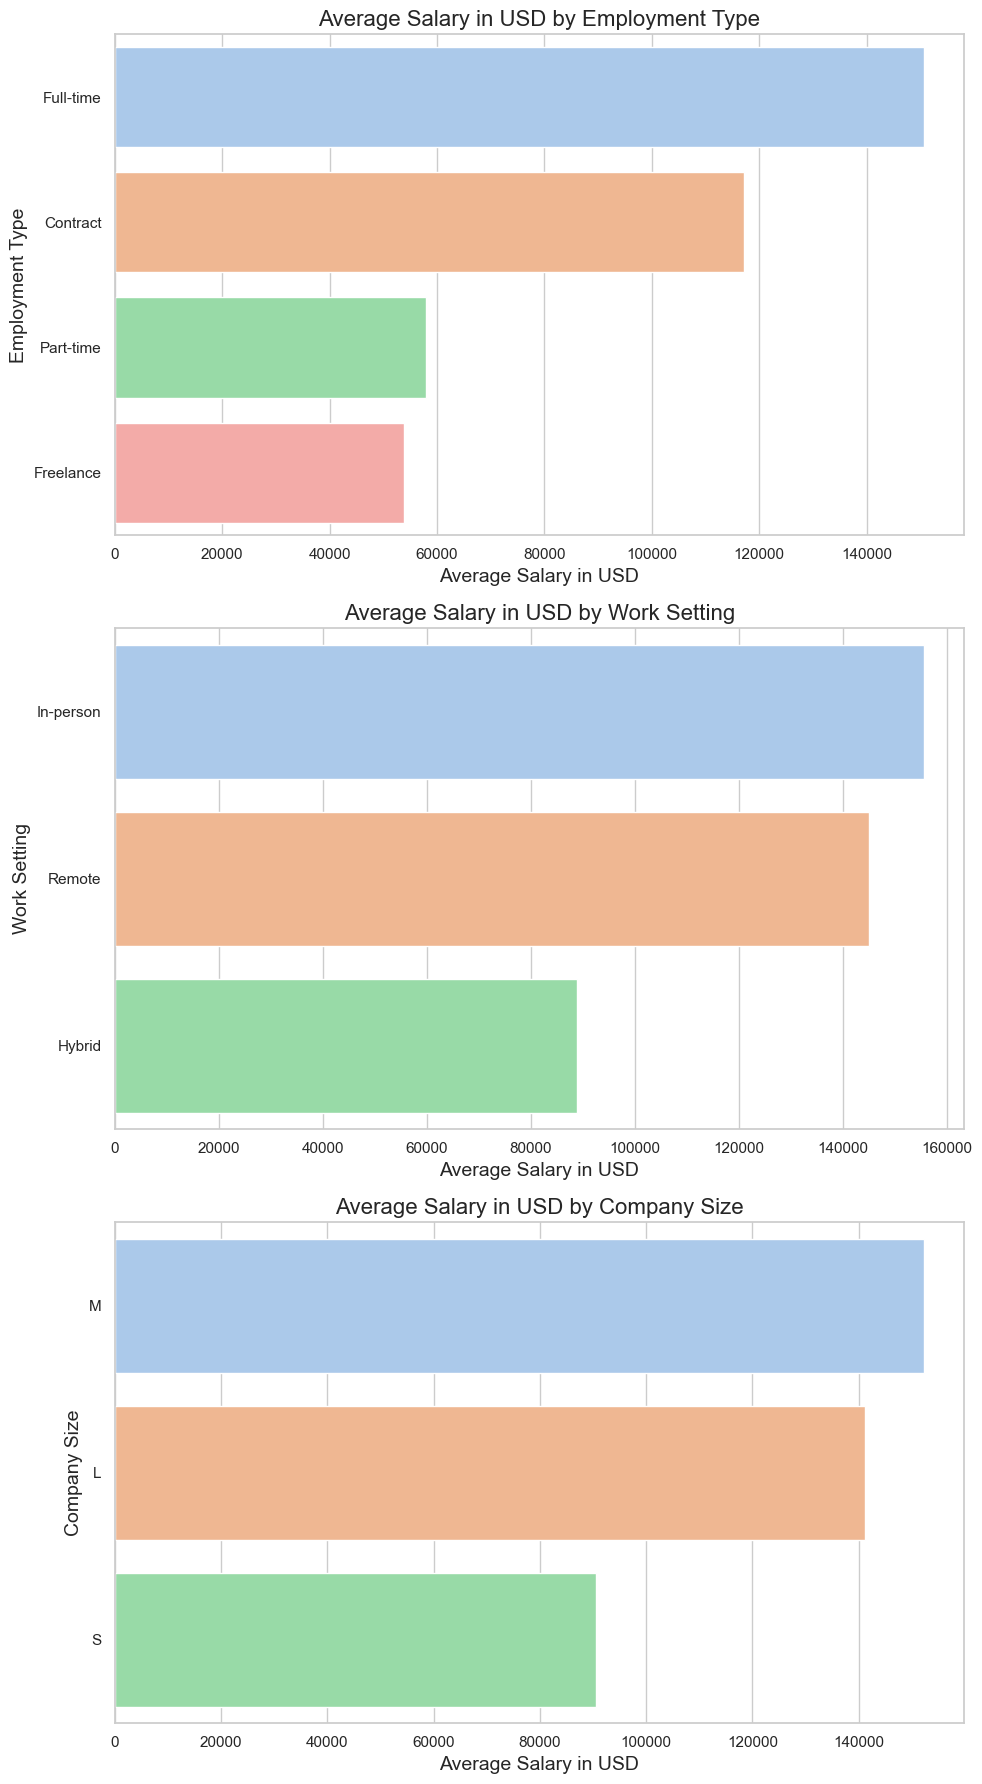

In [86]:
# Calculate average salary by employment type
average_salary_by_employment_type = data.groupby('employment_type')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()
average_salary_by_employment_type.rename(columns={'salary_in_usd': 'average_salary_in_usd'}, inplace=True)

# Calculate average salary by work setting
average_salary_by_work_setting = data.groupby('work_setting')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()
average_salary_by_work_setting.rename(columns={'salary_in_usd': 'average_salary_in_usd'}, inplace=True)

# Calculate average salary by company size
average_salary_by_company_size = data.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()
average_salary_by_company_size.rename(columns={'salary_in_usd': 'average_salary_in_usd'}, inplace=True)

# Visualization
fig, ax = plt.subplots(3, 1, figsize=(10, 18))

# Employment Type
sns.barplot(x='average_salary_in_usd', y='employment_type', data=average_salary_by_employment_type, palette='pastel', ax=ax[0])
ax[0].set_title('Average Salary in USD by Employment Type', fontsize=16)
ax[0].set_xlabel('Average Salary in USD', fontsize=14)
ax[0].set_ylabel('Employment Type', fontsize=14)

# Work Setting
sns.barplot(x='average_salary_in_usd', y='work_setting', data=average_salary_by_work_setting, palette='pastel', ax=ax[1])
ax[1].set_title('Average Salary in USD by Work Setting', fontsize=16)
ax[1].set_xlabel('Average Salary in USD', fontsize=14)
ax[1].set_ylabel('Work Setting', fontsize=14)

# Company Size
sns.barplot(x='average_salary_in_usd', y='company_size', data=average_salary_by_company_size, palette='pastel', ax=ax[2])
ax[2].set_title('Average Salary in USD by Company Size', fontsize=16)
ax[2].set_xlabel('Average Salary in USD', fontsize=14)
ax[2].set_ylabel('Company Size', fontsize=14)

plt.tight_layout()
plt.show()
